In [2]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *
from nba_api.stats.endpoints import playerdashptshots, leaguedashplayerbiostats

pd.options.mode.chained_assignment = None
league = "NBA"
data_DIR = "../data/synergy/"

In [14]:
season_start = 2018
season_end = 2024
seasons = np.arange(season_start,season_end,1)
dfa = []
for season in seasons:
    df1 = pd.read_parquet(data_DIR + f"{league}_Shots_{season}_All.parquet")
    df1["Season"] = season +1
    dfa.append(df1)
df = pd.concat(dfa)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100828 entries, 0 to 173
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PLAYER_ID                      100828 non-null  int64  
 1   PLAYER_NAME                    100828 non-null  object 
 2   PLAYER_LAST_TEAM_ID            100828 non-null  int64  
 3   PLAYER_LAST_TEAM_ABBREVIATION  100828 non-null  object 
 4   AGE                            100828 non-null  float64
 5   GP                             100828 non-null  int64  
 6   G                              100828 non-null  int64  
 7   FGA_FREQUENCY                  100828 non-null  float64
 8   FGM                            100828 non-null  int64  
 9   FGA                            100828 non-null  int64  
 10  FG_PCT                         100828 non-null  float64
 11  EFG_PCT                        100828 non-null  float64
 12  FG2A_FREQUENCY                 100828 

In [18]:
df = df[["PLAYER_ID","PLAYER_NAME","PLAYER_LAST_TEAM_ID","FGM","FGA","FG2M","FG2A","FG3M","FG3A", 'general_range', 'closest_def', 'touch_time']]
df = df.query("general_range != 'Other'")
df_avg = df.groupby(['general_range', 'closest_def', 'touch_time']).sum()
df_avg = df_avg.drop(columns= ["PLAYER_ID","PLAYER_NAME","PLAYER_LAST_TEAM_ID"])
df_avg["xFG2"] = df_avg["FG2M"]/df_avg["FG2A"]
df_avg["xFG3"] = df_avg["FG3M"]/df_avg["FG3A"]
df_avg = df_avg.drop(columns =["FGM","FGA","FG2M","FG2A","FG3M","FG3A"])
df_avg = df_avg.reset_index()

In [21]:
dfb = []
for df1 in dfa:
    df2 = df1[["PLAYER_ID","PLAYER_NAME","PLAYER_LAST_TEAM_ID","FGM","FGA","FG2M","FG2A","FG3M","FG3A", 'general_range', 'closest_def', 'touch_time']]
    df2 = df2.query("general_range != 'Other'")
    df_avg1 = df2.groupby(['general_range', 'closest_def', 'touch_time']).sum()
    df_avg1 = df_avg1.drop(columns= ["PLAYER_ID","PLAYER_NAME","PLAYER_LAST_TEAM_ID"])
    df_avg1["xFG2"] = df_avg1["FG2M"]/df_avg1["FG2A"]
    df_avg1["xFG3"] = df_avg1["FG3M"]/df_avg1["FG3A"]
    df_avg1 = df_avg1.drop(columns =["FGM","FGA","FG2M","FG2A","FG3M","FG3A"])
    df_avg1["Season"] = df1["Season"].iloc[0]
    df_avg1 = df_avg1.reset_index()
    dfb.append(df_avg1)
df_a = pd.concat(dfb)

In [25]:
df_a = df_a.reset_index()

In [42]:
df_p

,index,general_range,closest_def,touch_time,xFG2,xFG3,Season
27,27,Pull Ups,6+ Feet - Wide Open,Touch < 2 Seconds,0.611862,0.382644,2019
55,27,Pull Ups,6+ Feet - Wide Open,Touch < 2 Seconds,0.626092,0.387174,2020
83,27,Pull Ups,6+ Feet - Wide Open,Touch < 2 Seconds,0.637423,0.392632,2021
111,27,Pull Ups,6+ Feet - Wide Open,Touch < 2 Seconds,0.655125,0.382868,2022
139,27,Pull Ups,6+ Feet - Wide Open,Touch < 2 Seconds,0.677626,0.387581,2023
167,27,Pull Ups,6+ Feet - Wide Open,Touch < 2 Seconds,0.680695,0.392376,2024


C:\Users\pansr\AppData\Local\Temp\ipykernel_104956\733365083.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


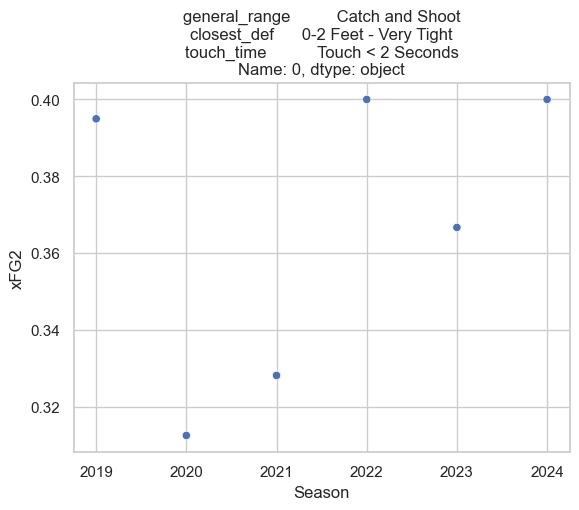

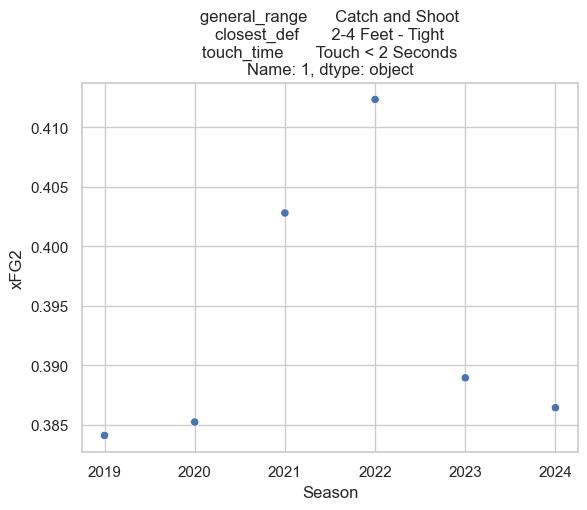

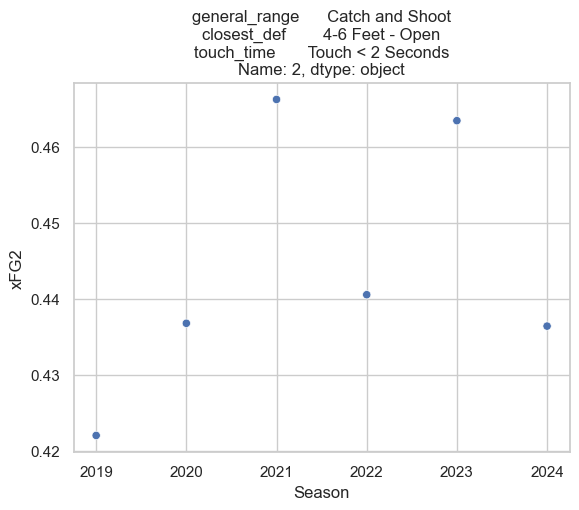

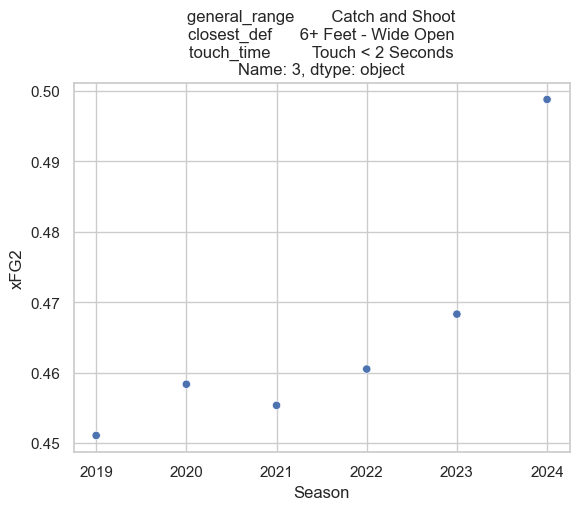

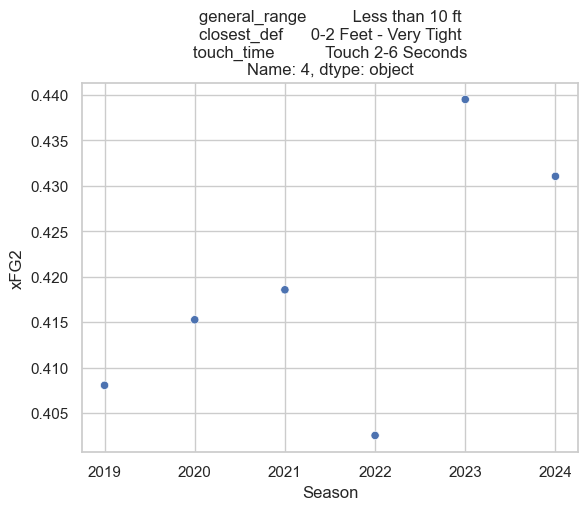

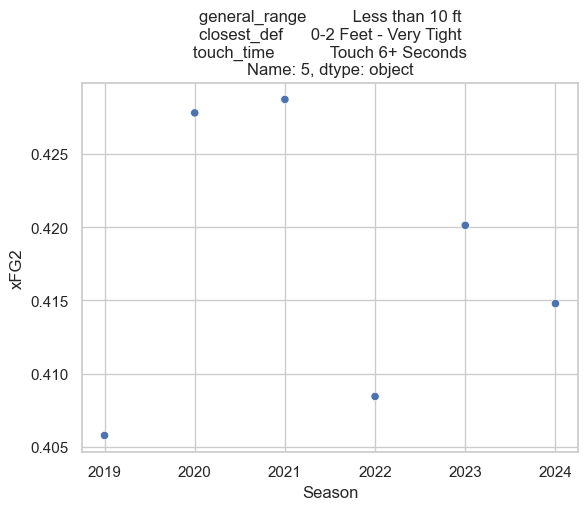

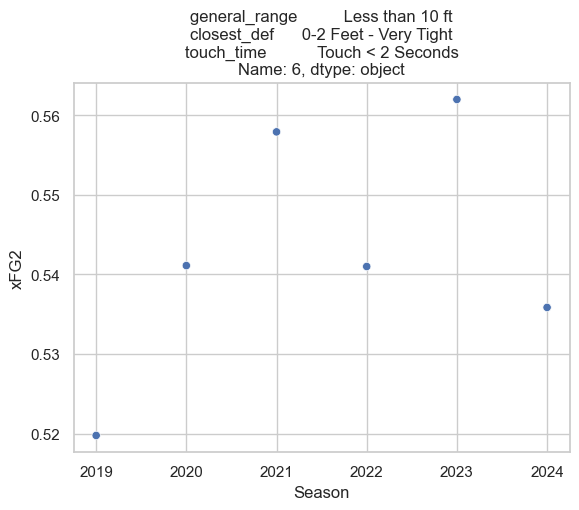

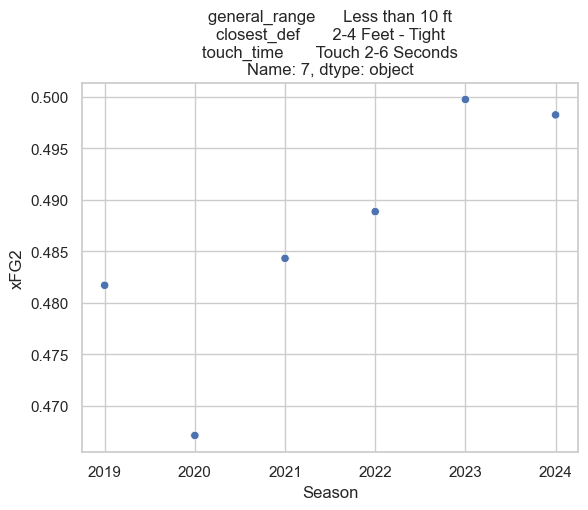

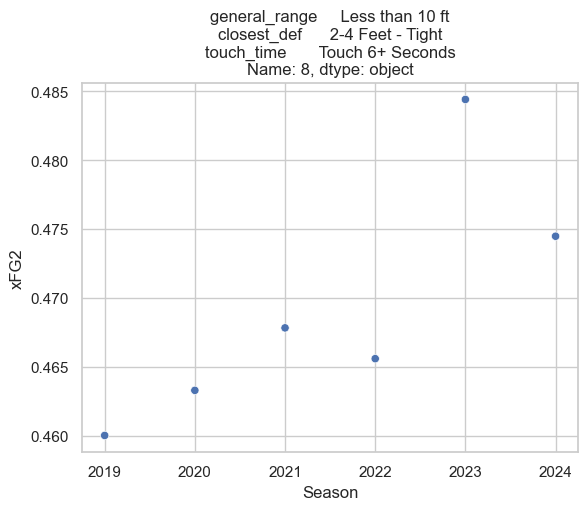

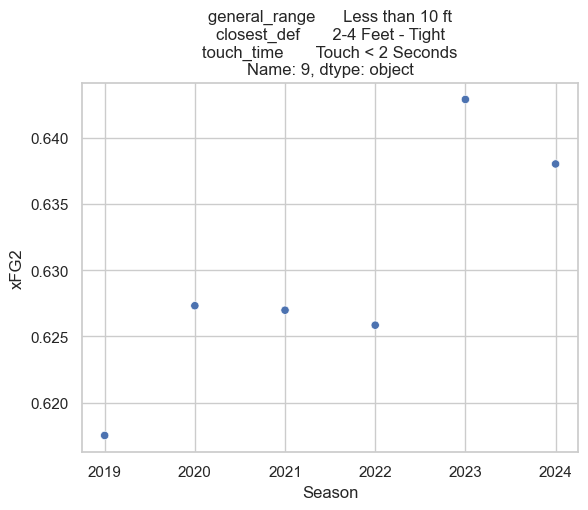

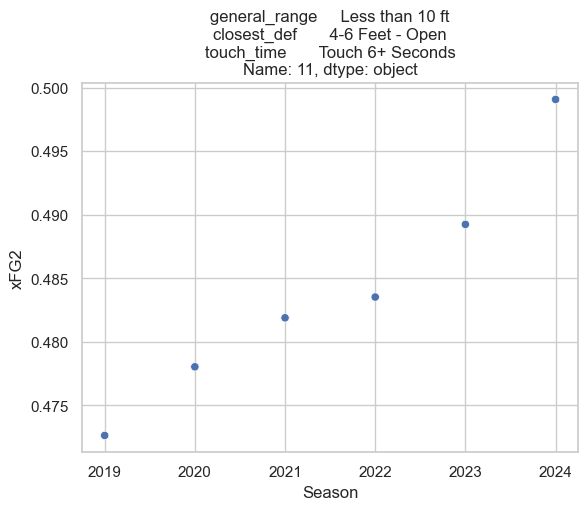

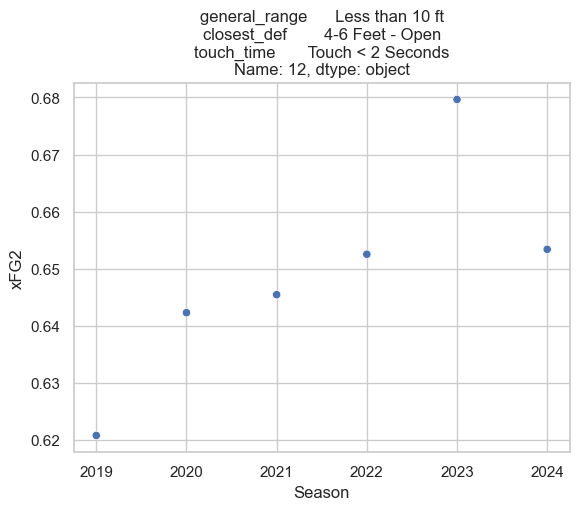

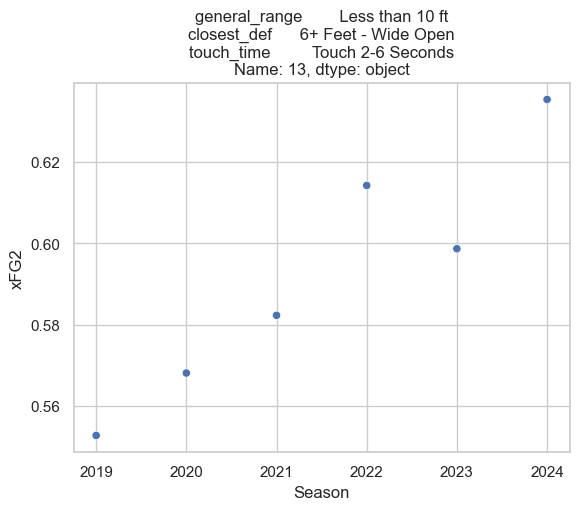

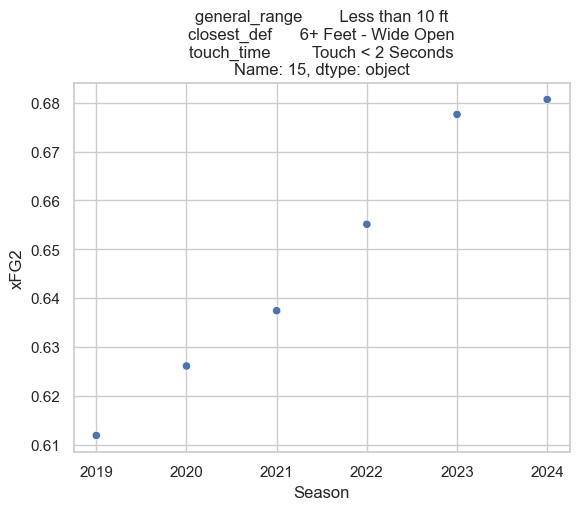

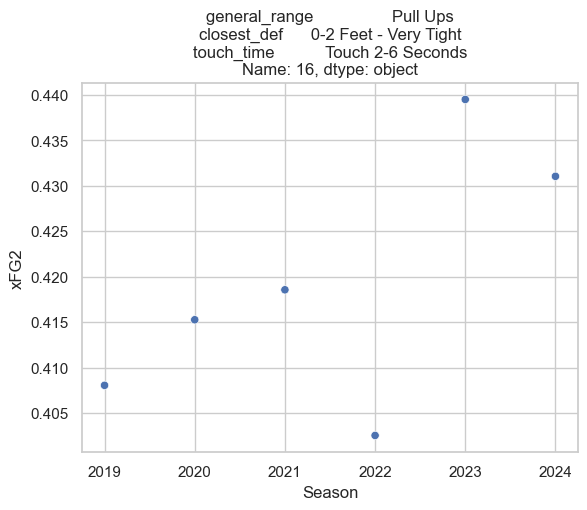

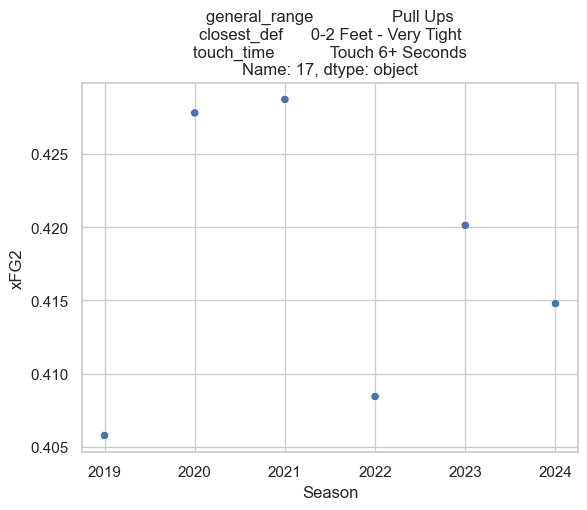

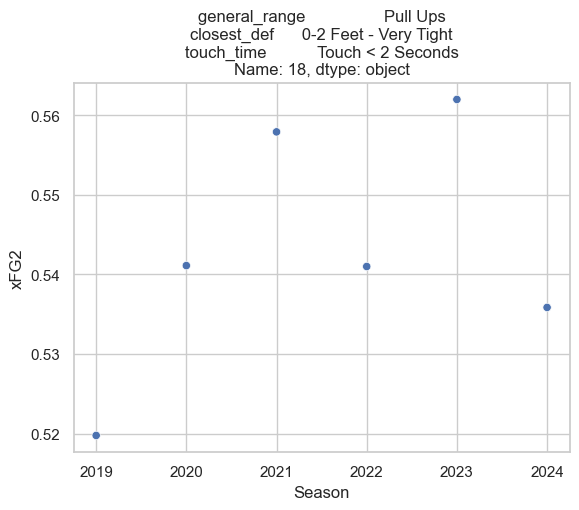

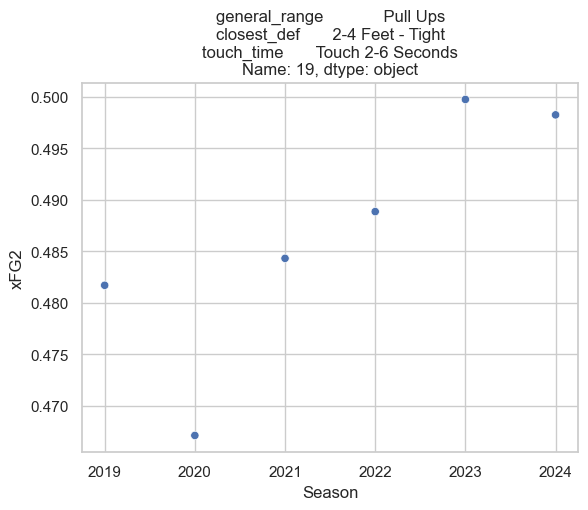

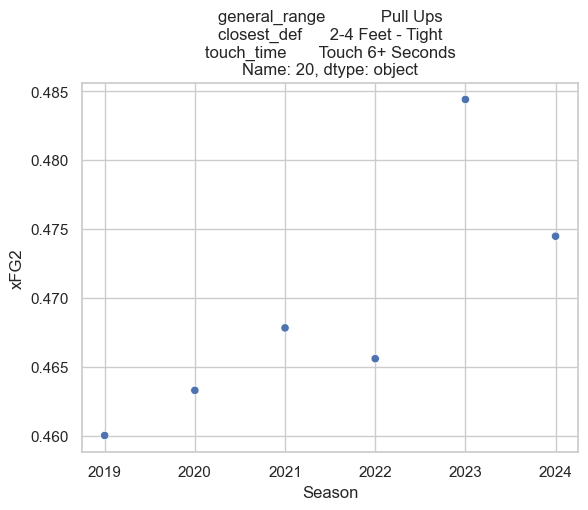

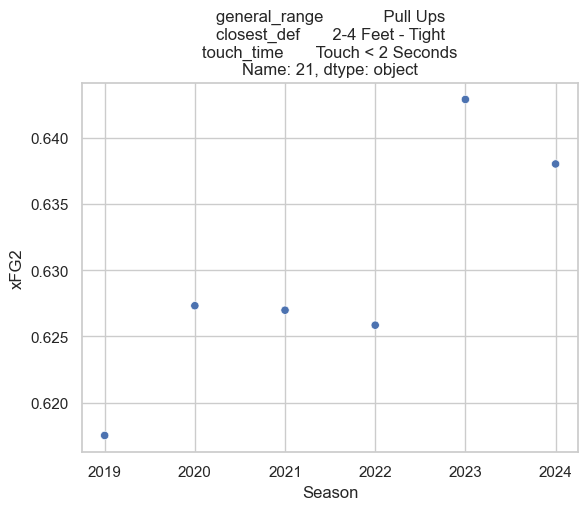

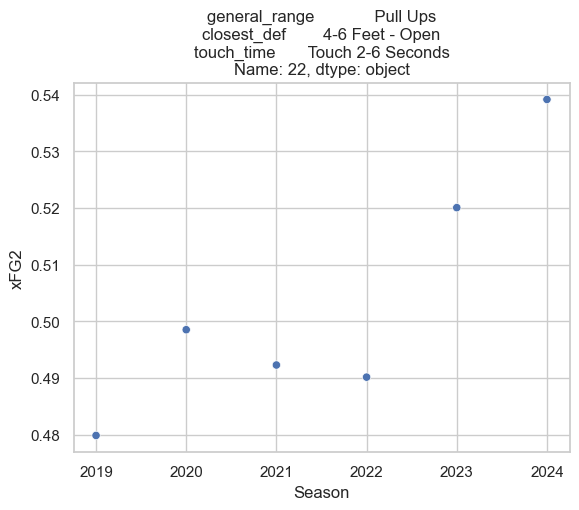

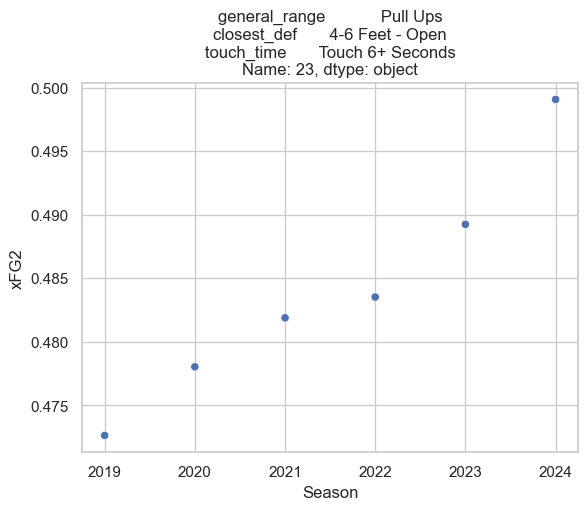

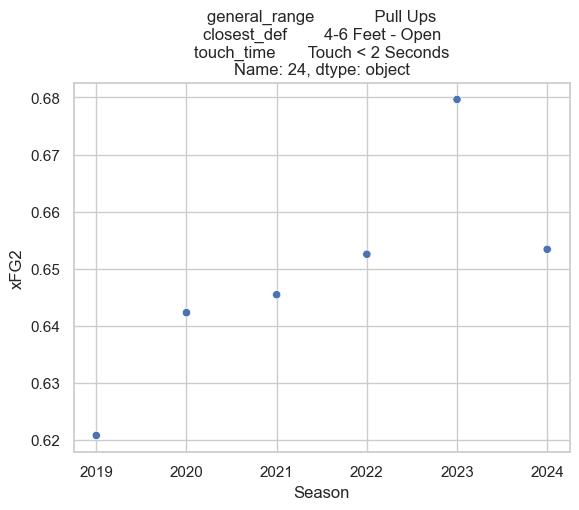

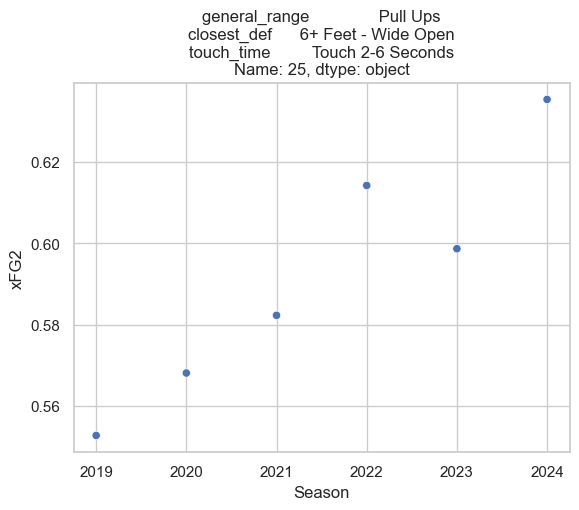

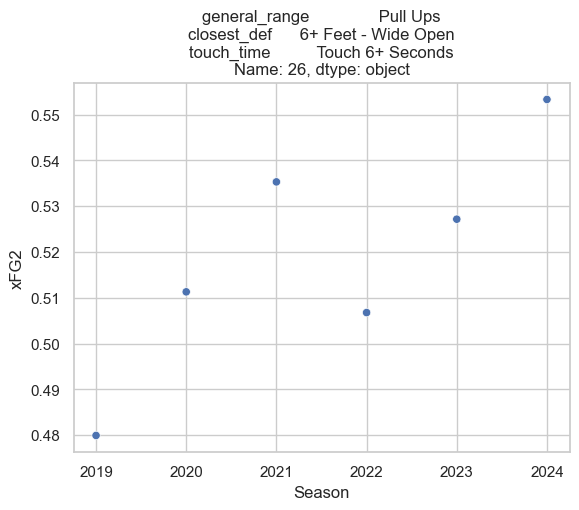

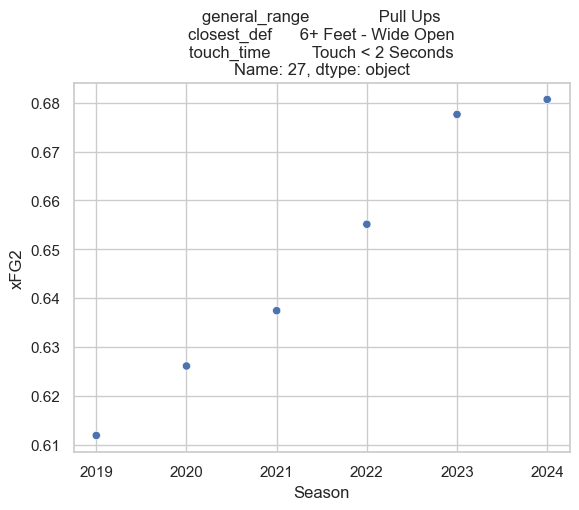

In [44]:
for i in range(28):
    fig, ax = plt.subplots(1,1)
    df_p = df_a.query(f"index == {i}")
    sns.scatterplot(data=df_p,x="Season",y="xFG2", style ="index",legend=False, ax = ax)
    ax.set_title(f"{df_p.iloc[0,1:4]}")
